# EDA: Forest Cover Type Prediction

### Data Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

### Data Fields
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import time
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data into dataframe for exploration.

In [2]:
data = pd.read_csv(r"../Data/covtype.csv")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points'),
  Text(10, 0, 'Wilderness_Area1'),
  Text(11, 0, 'Wilderness_Area2'),
  Text(12, 0, 'Wilderness_Area3'),
  Text(13, 0, 'Wilderness_Area4'),
  Text(14, 0, 'Soil_Type1'),
  Text(15, 0, 'Soil_Type2'),
  Text(16, 0, 'Soil_Type3'),
  Text(17, 0, 'Soil_Type4'),
  Text(18, 0, 'Soil_Type5'),
  Text(19, 0, 'Soil_Type6'),
  Text(20, 0, 'Soil_Type7'),
  Text(21, 0, 'Soil_Type8'),
  Text(

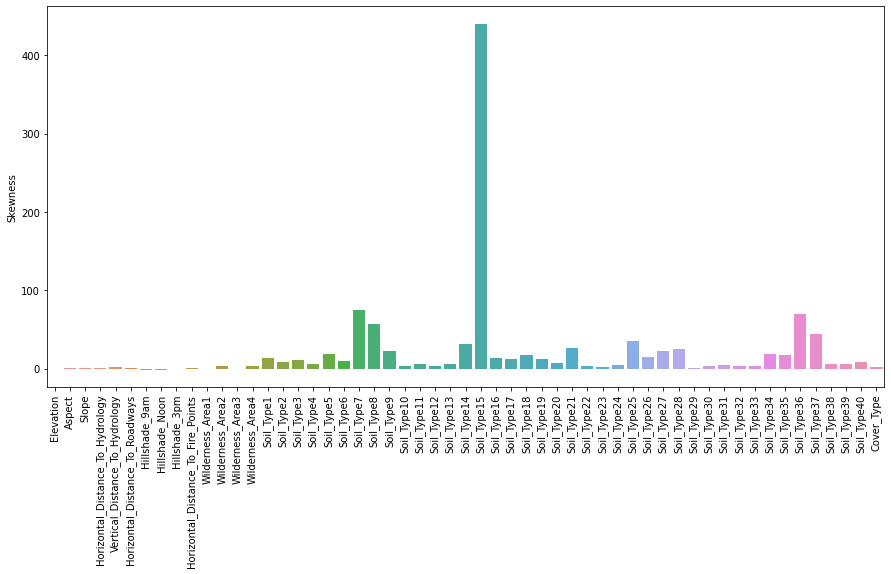

In [3]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

#### Some of the Variables are heavily skewed hence need to be corrected or transformed on a later stage.


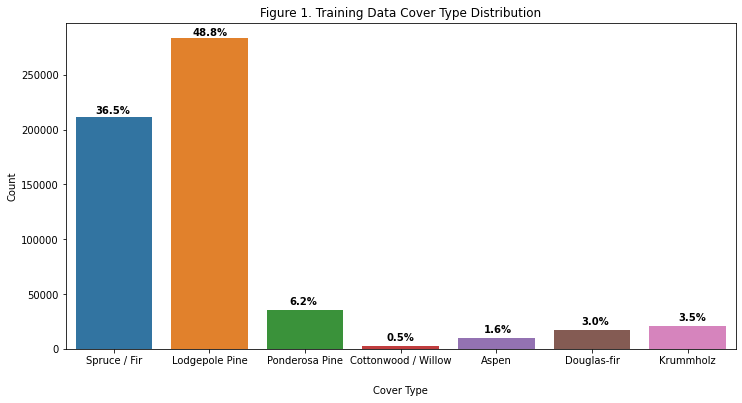

In [4]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
fig_height = 6
fig_width = 12
fig, ax = plt.subplots(figsize=(fig_width,fig_height))
width = 0.35  # the width of the bars
sns.barplot(x=class_label.index,y='Size',data=class_label)

for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    label = str(round(percent,1)) + '%'
    plt.annotate(label, xy=(i*fig_height*1.35*fig_width+95,1.05*percent*fig_height+60), xycoords='figure points', horizontalalignment='left',weight='bold');
    
plt.xlabel("Cover Type", labelpad = 20)
plt.ylabel("Count")
plt.title("Figure 1. Training Data Cover Type Distribution")
labels = ["Spruce / Fir", "Lodgepole Pine", "Ponderosa Pine", 
          "Cottonwood / Willow", "Aspen", "Douglas-fir", "Krummholz"]
plt.xticks(range(len(labels)), labels)
ax = plt.gca()
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

fig.savefig("dist.jpeg", dpi=fig.dpi,bbox_inches='tight')
plt.show()

Well over 70% of the data is types 1 and 2.  We should be aware of this as we try to fit our data, making sure we do not overfit because of this skewness.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

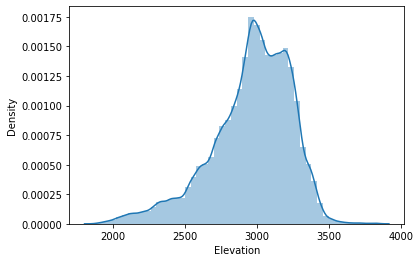

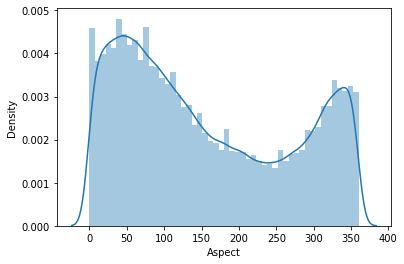

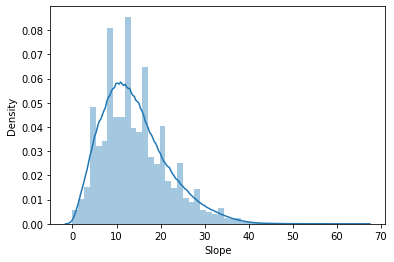

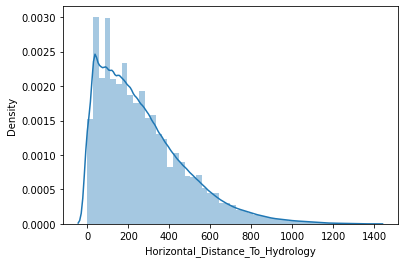

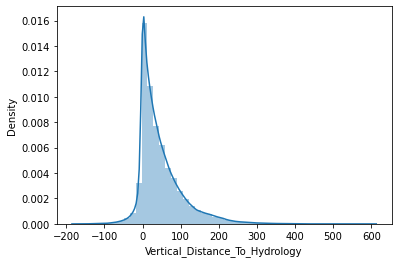

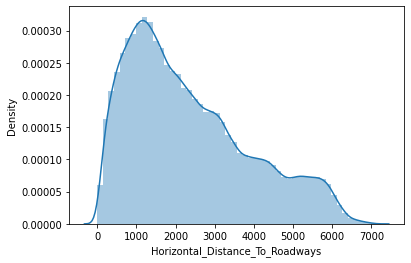

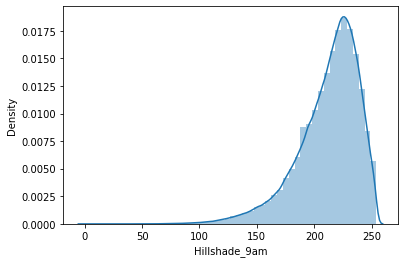

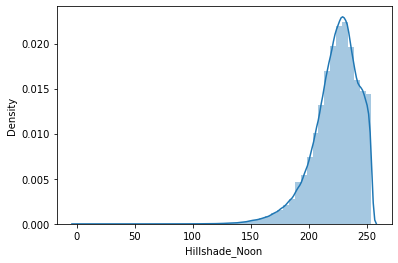

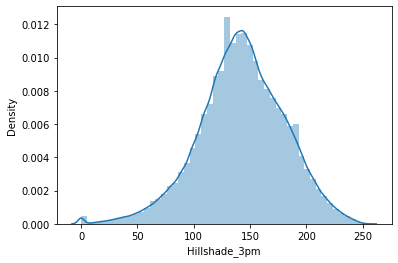

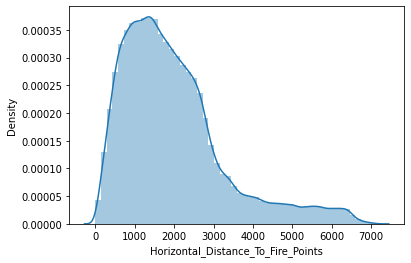

In [5]:
#get same plots as shown in Kaggle for EDA
continous_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
for i, col in enumerate(continous_data.columns):
    plt.figure(i)
    sns.distplot(continous_data[col])

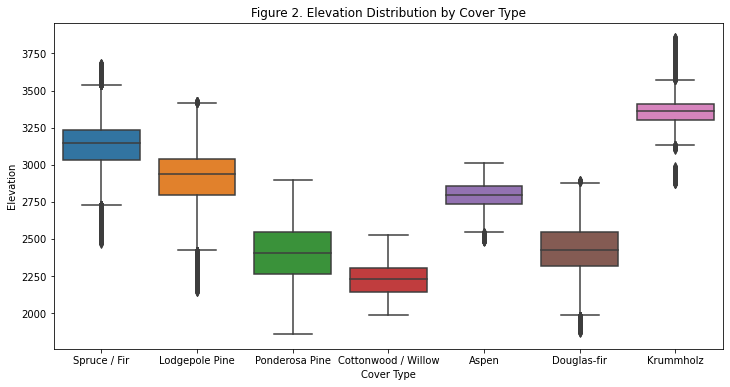

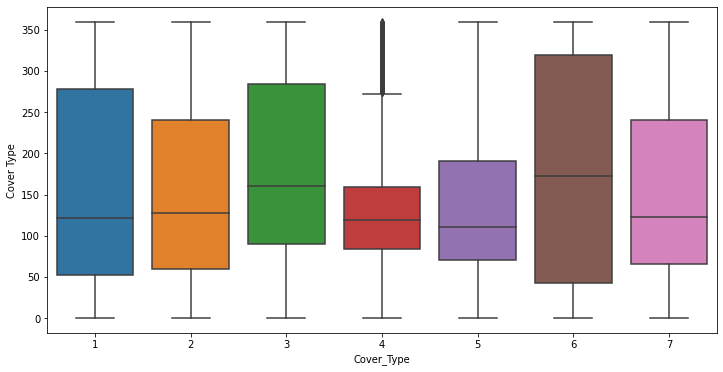

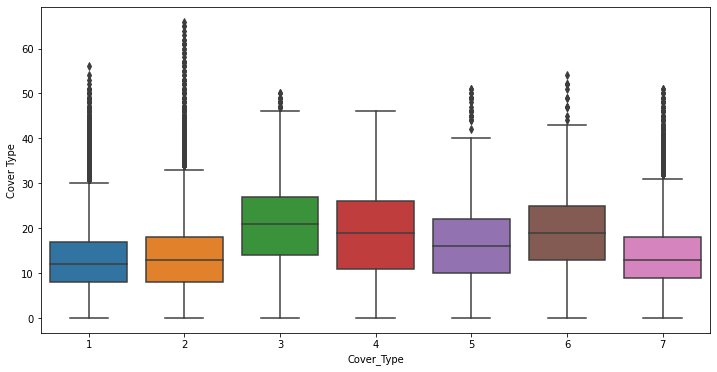

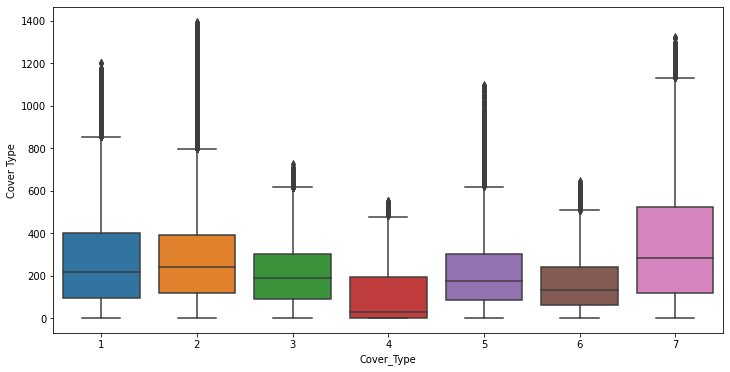

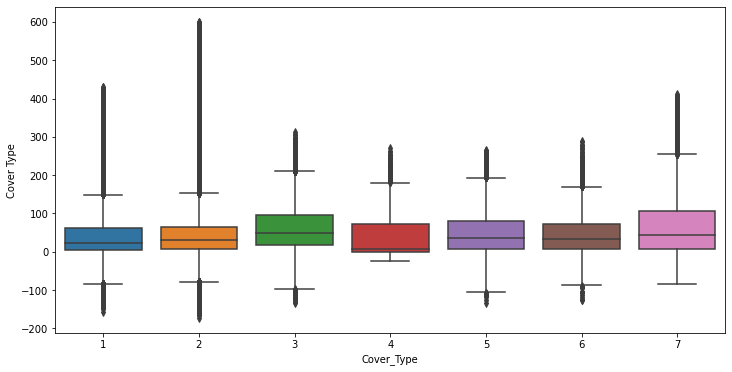

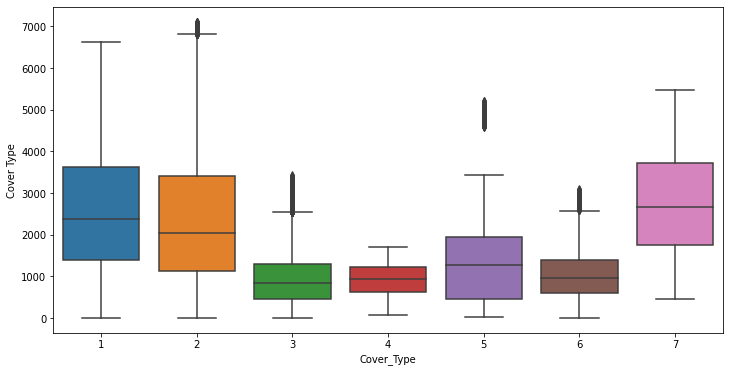

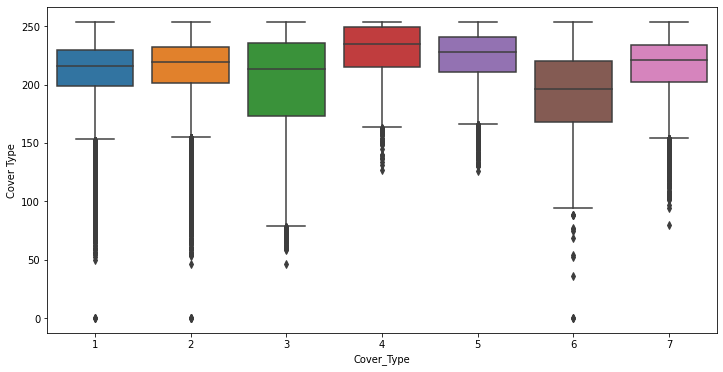

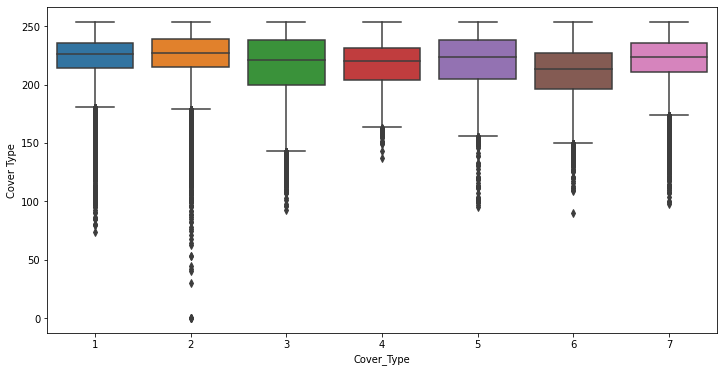

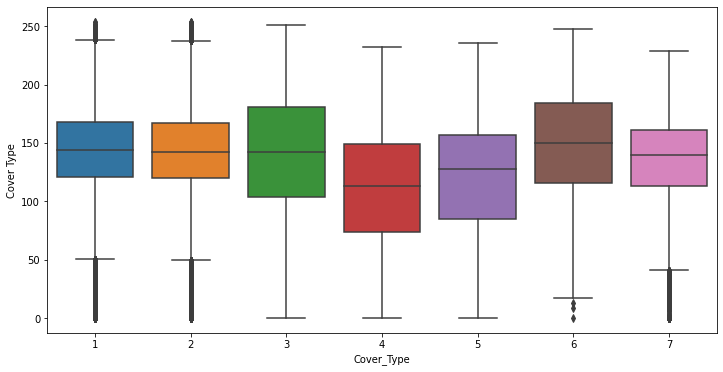

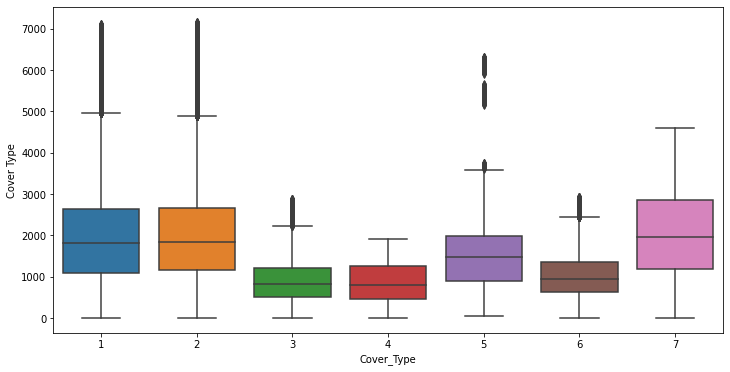

In [9]:
data['Cover_Type']=data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(continous_data.columns):
    plt.figure(i,figsize=(12,6))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data)
    plt.ylabel("Cover Type")
    
    if i == 0:
        
        labels = ["Spruce / Fir", "Lodgepole Pine", "Ponderosa Pine", 
          "Cottonwood / Willow", "Aspen", "Douglas-fir", "Krummholz"]
        plt.xticks(range(len(labels)), labels)
    
        plt.title("Figure 2. Elevation Distribution by Cover Type")
        plt.ylabel("Elevation")
        plt.xlabel("Cover Type")
        ax = plt.gca()
        ax.set_facecolor('white')
        fig.patch.set_facecolor('white')

        plt.savefig("elevation.jpeg", dpi=fig.dpi,bbox_inches='tight')

For all of this continous data - the most telling in the EDA is the elevation.

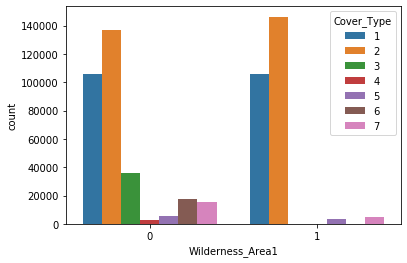

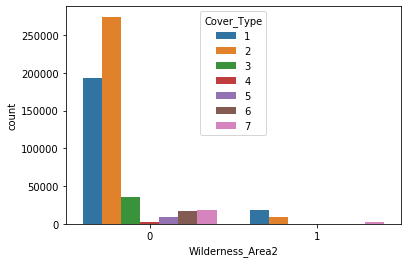

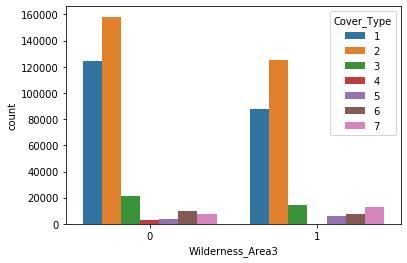

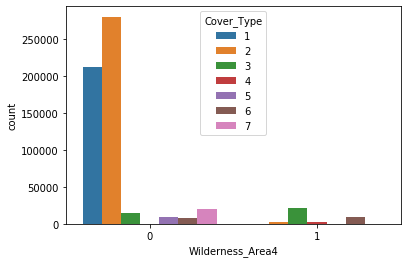

In [7]:
Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

for i, col in enumerate(Wilderness_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'], data=data)

  Interesting to note how cover type can very dependant on Wilderness Areas. Areas 2 and 4 have little of cover types 1 and 2, the most common of cover types.